In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import pickle
from timeit import default_timer as timer
import sklearn
from sklearn.preprocessing import scale
from sklearn.manifold import Isomap, TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import umap
import seaborn as sns
import matplotlib.cm as cm
import random

from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import mannwhitneyu

# from pysankey import sankey

from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, SpectralClustering, Birch
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
import igraph
from math import ceil
from timeit import default_timer as timer
import subprocess
from pathlib import Path
from numpy import linalg as LA

import neuro_morpho_toolbox as nmt
from neuro_morpho_toolbox.ml_utilities import *
from neuro_morpho_toolbox.plot import qualitative_scatter, cell_in_map

import SimpleITK as sitk

from ipywidgets import interactive
import ipywidgets as widgets

import plotly.plotly as py
import plotly.offline as po
import plotly.graph_objs as go

po.init_notebook_mode(connected=True)

import colorlover as cl
from IPython.display import HTML

bs_child_to_parent = {}

for pid in nmt.bs.selected_regions:
    pname = nmt.bs.level.loc[pid, "Abbrevation"]
    cname = [nmt.bs.level.loc[i, "Abbrevation"] for i in nmt.bs.get_all_child_id(pid)]
    for i in cname:
        bs_child_to_parent[i] = pname
bs_child_to_parent["unknown"] = "unknown"

/Users/pengxie/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


/Users/pengxie/Documents/Research/python/neuro_morhpo_toolbox/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.87
Loading CCF brain structure data...
Loading time: 0.01


/Users/pengxie/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Visualize swc

In [20]:
[ns_resample] = pickle.load(open("neuron_set_resample.pickle", 'rb'))
# [metadata] = pickle.load(open("metadata_cluster.pickle", 'rb'))
[metadata] = pickle.load(open("metadata_cluster_cocluster.pickle", 'rb'))


In [21]:
# df = pd.read_excel("../Subjective_celltype/tracking_table_QW_hz_LjL_09122019.284_cells.xlsx", index_col=[0])
# region_list = pd.read_excel("../Subjective_celltype/tracking_table_QW_hz_LjL_09122019.284_cells.xlsx", sheet_name=1, header=None)[2].tolist()

# # metadata = ns.features['soma_features'].region.copy()
# metadata['Celltype'] = df.loc[metadata.index, "Confirmed"]
# # # metadata['Celltype_note'] = df.loc[metadata.index, "Lijuan Note"]
# # # metadata.loc[metadata["Celltype_note"]=="CPU", "Celltype"] = "CPU"
# metadata.fillna("Others", inplace=True)
# metadata.loc[metadata.Celltype.isin(["TH", "VPM/VPL"]), "Celltype"] = "TH_Uncertain"
# metadata.loc[~metadata.Celltype.isin(["Others", "TH_Uncertain"]+region_list), "Celltype"] = "Others"
# print(metadata.Celltype.value_counts())
# # metadata
# # pickle.dump([metadata], open("metadata.pickle", "wb"))

In [22]:
df = pd.read_excel("../Subjective_celltype/tracking_table_QW_hz_LjL_px_09162019.284_cells.xlsx", index_col=[0])
region_list = pd.read_excel("../Subjective_celltype/tracking_table_QW_hz_LjL_px_09162019.284_cells.xlsx", sheet_name=1, header=None)[2].tolist()

# metadata = ns.features['soma_features'].region.copy()
metadata['Celltype'] = df.loc[metadata.index, "Confirmed"]
# # metadata['Celltype_note'] = df.loc[metadata.index, "Lijuan Note"]
# # metadata.loc[metadata["Celltype_note"]=="CPU", "Celltype"] = "CPU"
metadata.fillna("Others", inplace=True)
metadata.loc[metadata.Celltype.isin(["TH", "VPM/VPL"]), "Celltype"] = "TH_Uncertain"
metadata.loc[~metadata.Celltype.isin(["Others", "TH_Uncertain"]+region_list), "Celltype"] = "Others"
print(metadata.Celltype.value_counts())
# metadata
# pickle.dump([metadata], open("metadata.pickle", "wb"))

VPM    36
LGd    35
MG     21
VPL    21
LP      5
PO      2
AM      2
MD      2
RT      1
PCN     1
VM      1
VAL     1
IMD     1
Name: Celltype, dtype: int64


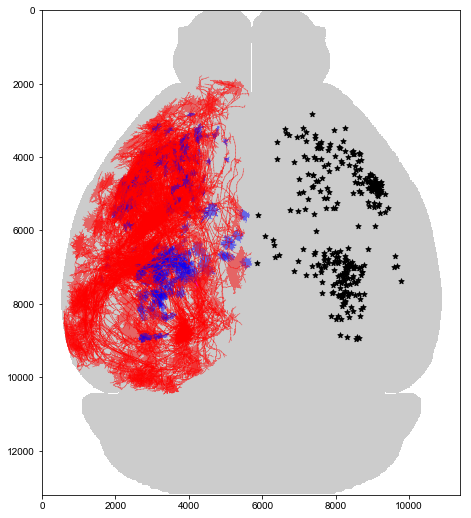

In [4]:
fig, ax = plt.subplots(1,1,figsize=(7.5,9))
cell_in_map(ns_resample.neurons, 
            ns_resample.names, 
            metadata, 
            ccf_annotation=nmt.annotation, 
            view="Horizontal", 
            color="classical",
            ax=ax
           )
fig.savefig('../Figure/Cell_in_map.pdf')

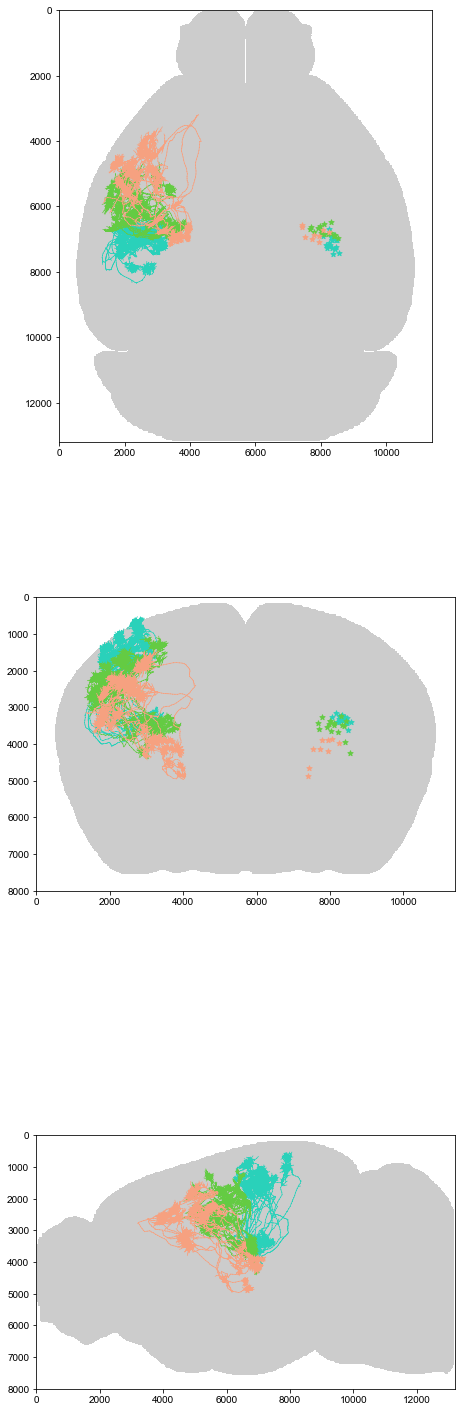

In [26]:
fig, ax = plt.subplots(3,1, figsize=(7.5, 27))

cur_list = metadata[metadata.cluster.isin(['C2', 'C3', 'C4'])].index.tolist()
cell_in_map(ns_resample.neurons, 
            cur_list, metadata, 
            ccf_annotation=nmt.annotation, 
            view="Horizontal", 
            color="cluster",
            alpha=1,
            ax=ax[0]
           )
cell_in_map(ns_resample.neurons, 
            cur_list, metadata, 
            ccf_annotation=nmt.annotation, 
            view="Coronal", 
            color="cluster",
            alpha=1,
            ax=ax[1]
           )
cell_in_map(ns_resample.neurons, 
            cur_list, metadata, 
            ccf_annotation=nmt.annotation, 
            view="Sagittal", 
            color="cluster",
            alpha=1,
            ax=ax[2]
           )

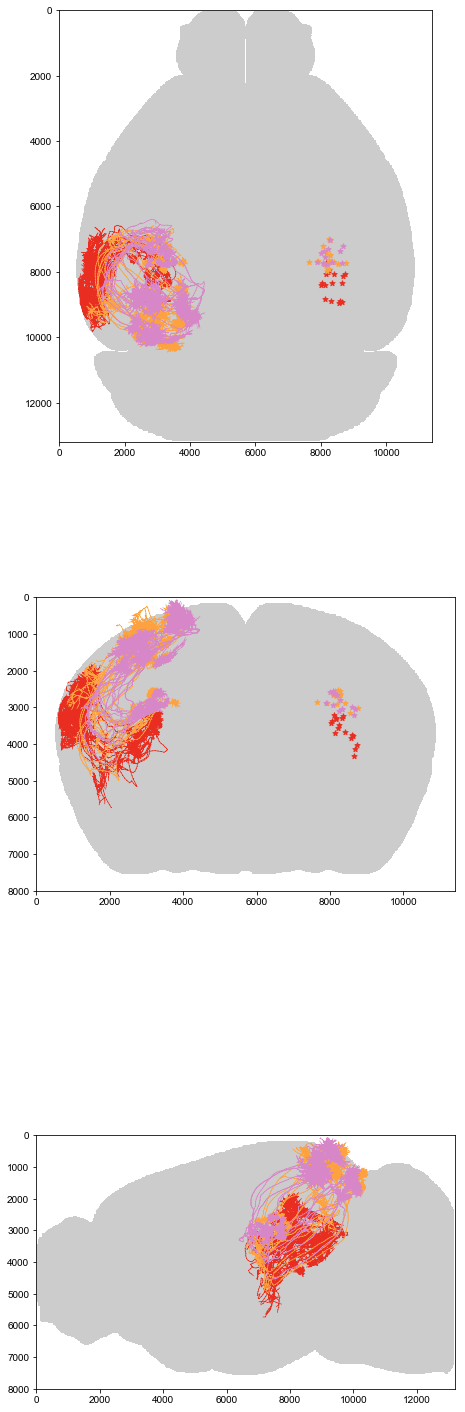

In [24]:
fig, ax = plt.subplots(3,1, figsize=(7.5, 27))

cur_list = metadata[metadata.cluster.isin(['C5', 'C6', 'C7'])].index.tolist()
cell_in_map(ns_resample.neurons, 
            cur_list, metadata, 
            ccf_annotation=nmt.annotation, 
            view="Horizontal", 
            color="cluster",
            alpha=1,
            ax=ax[0]
           )
cell_in_map(ns_resample.neurons, 
            cur_list, metadata, 
            ccf_annotation=nmt.annotation, 
            view="Coronal", 
            color="cluster",
            alpha=1,
            ax=ax[1]
           )
cell_in_map(ns_resample.neurons, 
            cur_list, metadata, 
            ccf_annotation=nmt.annotation, 
            view="Sagittal", 
            color="cluster",
            alpha=1,
            ax=ax[2]
           )

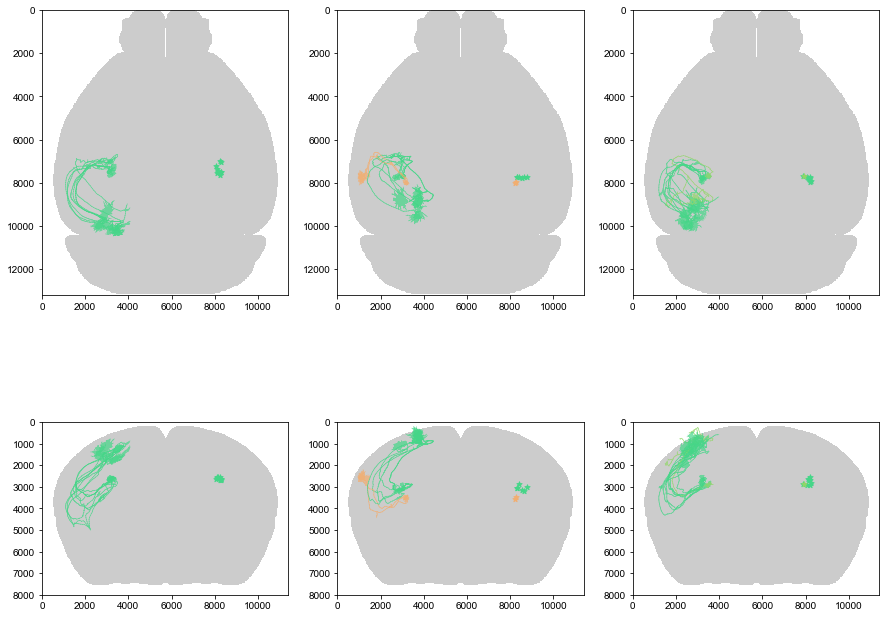

In [5]:
from neuro_morpho_toolbox.plot import cell_in_map


fig, ax = plt.subplots(2,3, figsize=(15, 12))

cluster_list = ['C1', 'C3', 'C4']
for i, cur_cluster in enumerate(cluster_list):
    cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
    cell_in_map(ns_resample.neurons, 
                cur_list, metadata, 
                ccf_annotation=nmt.annotation, 
                view="Horizontal", 
                color="Celltype",
                ax=ax[0, i]
               )
    
# fig, ax = plt.subplots(1,3, figsize=(15, 4))

for i, cur_cluster in enumerate(cluster_list):
    cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
    cell_in_map(ns_resample.neurons, 
                cur_list, metadata, 
                ccf_annotation=nmt.annotation, 
                view="Coronal", 
                color="Celltype",
                ax=ax[1, i]
               )
    
fig.savefig("cell_CCF_LGd.pdf")

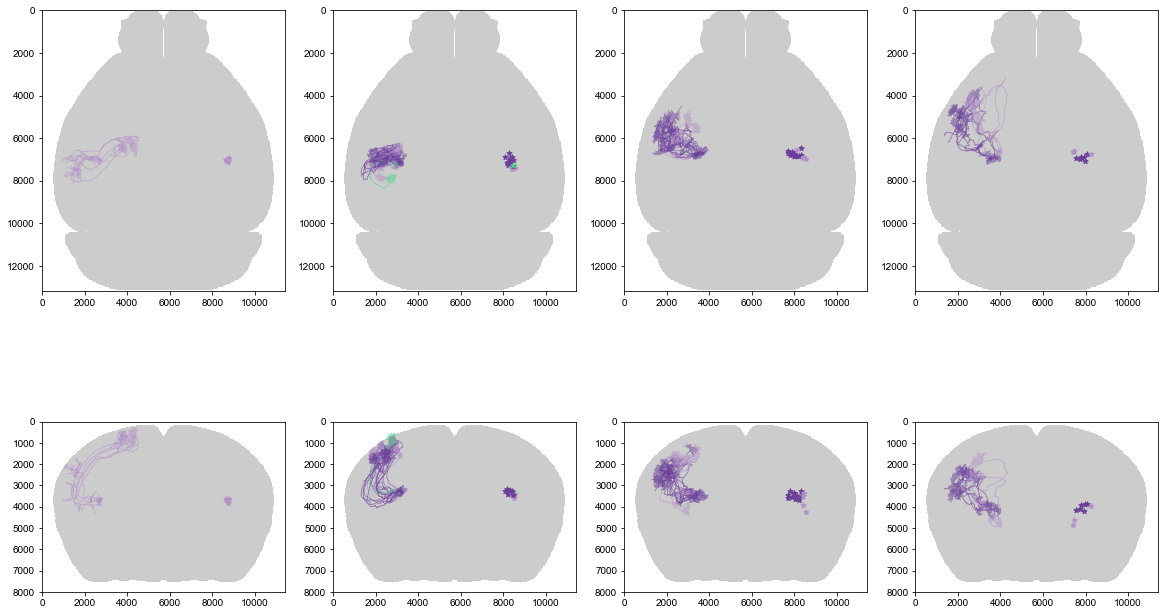

In [25]:

fig, ax = plt.subplots(2,4, figsize=(20, 12))

cluster_list = ['C1', 'C2', 'C3', 'C4']
for i, cur_cluster in enumerate(cluster_list):
    cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
    cell_in_map(ns_resample.neurons, 
                cur_list, metadata, 
                ccf_annotation=nmt.annotation, 
                view="Horizontal", 
                color="Celltype",
                ax=ax[0, i]
               )
    
# fig, ax = plt.subplots(1,3, figsize=(15, 4))

for i, cur_cluster in enumerate(cluster_list):
    cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
    cell_in_map(ns_resample.neurons, 
                cur_list, metadata, 
                ccf_annotation=nmt.annotation, 
                view="Coronal", 
                color="Celltype",
                ax=ax[1, i]
               )
    
fig.savefig("cell_CCF_VP.pdf")

In [ ]:

fig, ax = plt.subplots(2,4, figsize=(20, 12))

cluster_list = ['C0', 'C2', 'C5', 'C6']
for i, cur_cluster in enumerate(cluster_list):
    cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
    cell_in_map(ns_resample.neurons, 
                cur_list, metadata, 
                ccf_annotation=nmt.annotation, 
                view="Horizontal", 
                color="Celltype",
                ax=ax[0, i]
               )
    
# fig, ax = plt.subplots(1,3, figsize=(15, 4))

for i, cur_cluster in enumerate(cluster_list):
    cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
    cell_in_map(ns_resample.neurons, 
                cur_list, metadata, 
                ccf_annotation=nmt.annotation, 
                view="Coronal", 
                color="Celltype",
                ax=ax[1, i]
               )
    
fig.savefig("cell_CCF_VP.pdf")

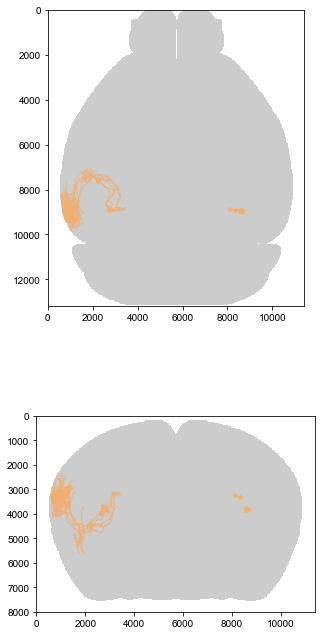

In [64]:
fig, ax = plt.subplots(2,1, figsize=(5, 12))

cluster_list = ['C7']
for i, cur_cluster in enumerate(cluster_list):
    cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
    cell_in_map(ns_resample.neurons, 
                cur_list, metadata, 
                ccf_annotation=nmt.annotation, 
                view="Horizontal", 
                color="Celltype",
                ax=ax[0]
               )
   

for i, cur_cluster in enumerate(cluster_list):
    cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
    cell_in_map(ns_resample.neurons, 
                cur_list, metadata, 
                ccf_annotation=nmt.annotation, 
                view="Coronal", 
                color="Celltype",
                ax=ax[1]
               )
   
# for i, cur_cluster in enumerate(cluster_list):
#     cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
#     cell_in_map(ns_resample.neurons, 
#                 cur_list, metadata, 
#                 ccf_annotation=nmt.annotation, 
#                 view="Sagittal", 
#                 color="Celltype",
#                 ax=ax[2]
#                )
fig.savefig("cell_CCF_MG.pdf")

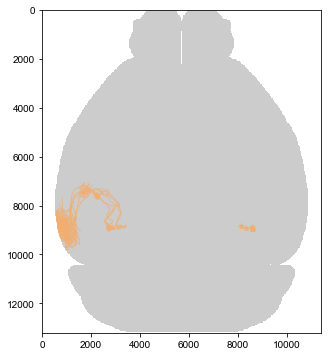

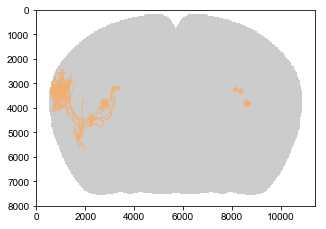

In [37]:
fig, ax = plt.subplots(1,1, figsize=(5, 6))

cluster_list = ['C7']
for i, cur_cluster in enumerate(cluster_list):
    cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
    cell_in_map(ns_resample.neurons, 
                cur_list, metadata, 
                ccf_annotation=nmt.annotation, 
                view="Horizontal", 
                color="Celltype",
                ax=ax
               )
   

fig, ax = plt.subplots(1,1, figsize=(5, 4))
for i, cur_cluster in enumerate(cluster_list):
    cur_list = metadata[metadata.cluster == cur_cluster].index.tolist()
    cell_in_map(ns_resample.neurons, 
                cur_list, metadata, 
                ccf_annotation=nmt.annotation, 
                view="Coronal", 
                color="Celltype",
                ax=ax
               )

In [7]:
metadata.head()

,Hemisphere,Region,Celltype,Brain_id,SWC,cluster
17302_00020,1,VPL,VPL,Brain_17302,../Data/swc/mapped/Data_for_analysis/swc/Whole...,C0
17302_00021,1,VPL,VPL,Brain_17302,../Data/swc/mapped/Data_for_analysis/swc/Whole...,C0
18464_00129,1,VPL,VPM,Brain_18464,../Data/swc/mapped/Data_for_analysis/swc/Whole...,C0
17545_00058,1,VPM,VPM,Brain_17545,../Data/swc/mapped/Data_for_analysis/swc/Whole...,C0
17545_00110,1,VPM,VPM,Brain_17545,../Data/swc/mapped/Data_for_analysis/swc/Whole...,C0
